In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm



plt.rcParams['font.family'] = 'Noto Sans KR'
plt.rcParams["axes.unicode_minus"] = False

# # 한글 글꼴 설정
# font_path = "/Library/Fonts/Arial Unicode.ttf"  # 설치한 글꼴의 경로
# font_prop = fm.FontProperties(fname=font_path, size=12)



# CSV 파일 불러오기
file_path = 'data/kc/combined_certifications.csv'
df = pd.read_csv(file_path)

df.info()

/var/folders/q0/9z_mzpps4v5f03vr8vrq6xk00000gn/T/ipykernel_56387/1067410732.py:18: DtypeWarning: Columns (0,5,10,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982270 entries, 0 to 982269
Data columns (total 23 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   certUid                 982267 non-null  object 
 1   certOrganName           982270 non-null  object 
 2   certNum                 982270 non-null  object 
 3   certState               982267 non-null  object 
 4   certDiv                 982269 non-null  object 
 5   certDate                982267 non-null  object 
 6   certChgDate             6 non-null       float64
 7   certChgReason           275348 non-null  object 
 8   firstCertNum            956386 non-null  object 
 9   productName             981682 non-null  object 
 10  brandName               14543 non-null   object 
 11  modelName               982251 non-null  object 
 12  categoryName            938048 non-null  object 
 13  importDiv               946225 non-null  object 
 14  makerName           

In [8]:
import matplotlib.font_manager as fm

# 시스템에 설치된 모든 글꼴 목록 가져오기
font_list = fm.findSystemFonts(fontpaths=None, fontext='ttf')

# 글꼴 이름 출력
for font in font_list:
    print(fm.FontProperties(fname=font).get_name())

BM Hanna Pro
Noto Sans Osage
Courier New
STIXIntegralsD
Apple Symbols
Corsiva Hebrew
Hiragino Sans
Georgia
Gmarket Sans TTF
Trebuchet MS
Trebuchet MS
Noto Sans Palmyrene
Skia
SimSong
Noto Sans NKo
DIN Condensed
Noto Sans Bhaiksuki
Geeza Pro
Gurmukhi Sangam MN
InaiMathi
Noto Sans Meroitic
Tamil MN
Brush Script MT
BM Jua
Al Bayan
Rockwell
STIX Two Text
Artifakt Element
Noto Sans Mende Kikakui
Weibei SC
.SF Armenian
PilGi
Noto Sans Old Permic
System Font
Noto Sans Armenian
Bangla Sangam MN
Noto Sans Batak
Noto Sans Javanese
Kai
Lucida Grande
Noto Serif Myanmar
Noto Sans Mro
Papyrus
STIXSizeFourSym
Noto Sans PhagsPa
Avenir Next
Hei
Noto Sans Siddham
Noto Sans Sharada
Comic Sans MS
Noto Sans Buhid
Iowan Old Style
Noto Sans Cuneiform
Kohinoor Devanagari
Menlo
Lantinghei SC
Big Caslon
.SF Compact Rounded
Verdana
Hiragino Sans
PingFang HK


RuntimeError: Could not set the fontsize (invalid pixel size; error code 0x17)

### 연도별 KC인증 수 추이

/Users/tom/ENV/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 108 (l) missing from font(s) Noto Sans NKo.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tom/ENV/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 112 (p) missing from font(s) Noto Sans NKo.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tom/ENV/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 48 (0) missing from font(s) Noto Sans NKo.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tom/ENV/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 50 (2) missing from font(s) Noto Sans NKo.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/tom/ENV/miniconda3/envs/py310/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 52 (4) missing from font(s) Noto Sans NKo.
  fig.canvas.print_figure(byte

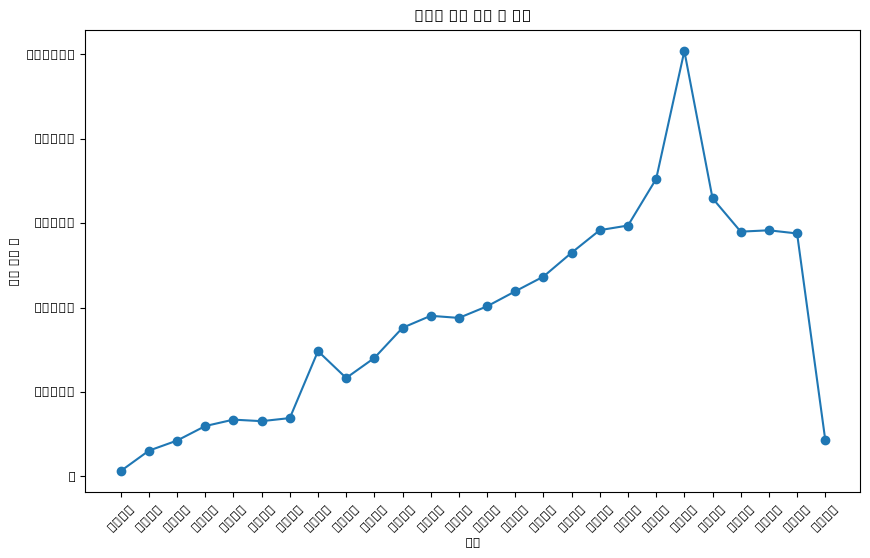

In [10]:

pattern = r'^\d{8}$'
df = df[df['certDate'].astype(str).str.match(pattern)]

df['year'] = df['certDate'].astype(str).str[:4]

# 연도별 리포트 개수 집계
year_counts = df.groupby('year').size().reset_index(name='report_count')

# 연도 순으로 정렬 (문자열 정렬일 경우 숫자로 변환 후 정렬하면 더 정확할 수 있습니다)
year_counts['year'] = year_counts['year'].astype(int)
year_counts = year_counts.sort_values('year')

# matplotlib을 이용해 추이 시각화
plt.figure(figsize=(10, 6))
plt.plot(year_counts['year'], year_counts['report_count'], marker='o')
plt.xlabel('연도')
plt.ylabel('KC 인증 수')
plt.title('연도별 KC 인증 수 추이')
plt.grid(False)
plt.xticks(year_counts['year'], rotation=45)  # 모든 연도를 x축에 표시하고 회전
plt.show()

### KC인증 상태 통계

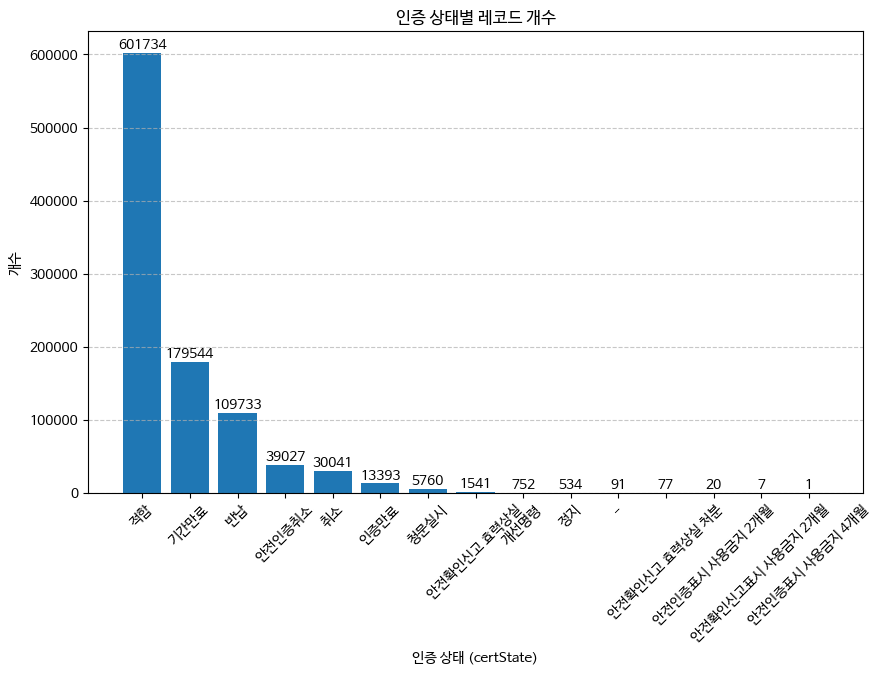

In [3]:
# certState 컬럼의 각 상태별 count 계산
state_counts = df['certState'].value_counts().reset_index()
state_counts.columns = ['certState', 'count']

# 막대그래프 시각화
plt.figure(figsize=(10, 6))
bars = plt.bar(state_counts['certState'], state_counts['count'])
plt.xlabel('인증 상태 (certState)')
plt.ylabel('개수')
plt.title('인증 상태별 레코드 개수')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# 각 막대 위에 데이터 라벨 추가
for bar in bars:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2, height, 
        f'{int(height)}', ha='center', va='bottom'
    )

plt.show()

### KC인증 수 나라별 통계

makerCntryName 별 상위 10개 국가 통계:
  makerCntryName   count
0             중국  421186
1             한국  376464
2            베트남   19776
3             일본   11841
4           이탈리아    8815
5             독일    7789
6          인도네시아    7616
7             대만    7008
8             태국    6303
9             미국    5739


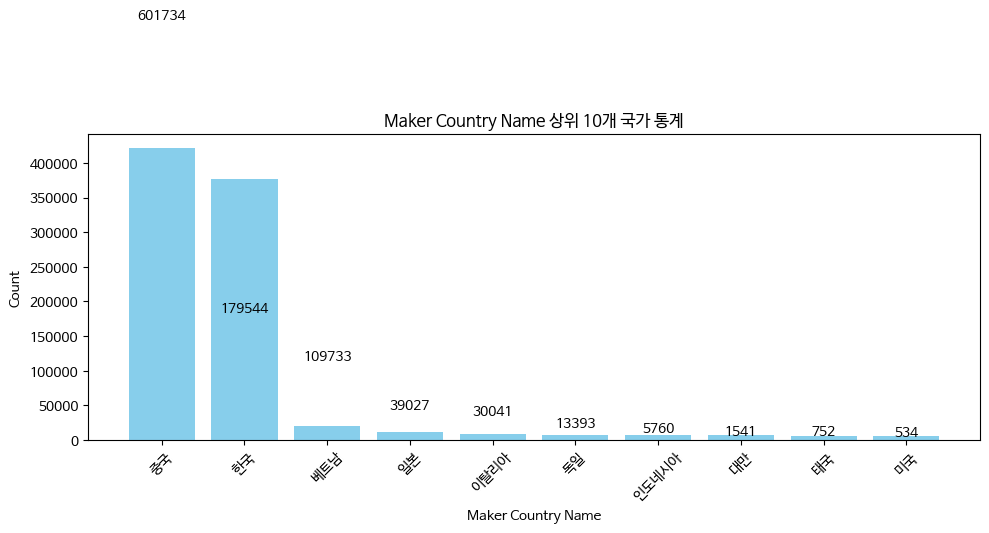

In [9]:


# '대한민국'을 '한국'으로 변경
df['makerCntryName'] = df['makerCntryName'].replace('대한민국', '한국')

# makerCntryName 별 통계 내기
country_stats = df['makerCntryName'].value_counts().reset_index()
country_stats.columns = ['makerCntryName', 'count']

# 상위 10개 국가만 선택
top_10_countries = country_stats.head(10)

# 통계 출력
print("makerCntryName 별 상위 10개 국가 통계:")
print(top_10_countries)

# 통계 시각화
plt.figure(figsize=(10, 6))
plt.bar(top_10_countries['makerCntryName'], top_10_countries['count'], color='skyblue')
plt.title('Maker Country Name 상위 10개 국가 통계')
plt.xlabel('Maker Country Name')
plt.ylabel('Count')
plt.xticks(rotation=45)
# 데이터 라벨 추가
for bar in bars[:10]:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# plt.tight_layout()
plt.show()